# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

###### Import librares

In [101]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

##### import DataFrame

In [102]:
df = pd.read_csv('demoCredit.csv')

In [103]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 29 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   qtd_filhos                              16650 non-null  int64  
 1   idade                                   16650 non-null  int64  
 2   tempo_emprego                           16650 non-null  float64
 3   possui_celular                          16650 non-null  int64  
 4   possui_fone_comercial                   16650 non-null  int64  
 5   possui_fone                             16650 non-null  int64  
 6   possui_email                            16650 non-null  int64  
 7   qt_pessoas_residencia                   16650 non-null  float64
 8   mau                                     16650 non-null  int64  
 9   sexo_M                                  16650 non-null  int64  
 10  posse_de_veiculo_Y                      16650 non-null  in

In [105]:
y = df.mau

In [106]:
X = df.drop('mau', axis=1)

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [108]:
clf = DecisionTreeClassifier(random_state=100)
clf = clf.fit(X_train, y_train)

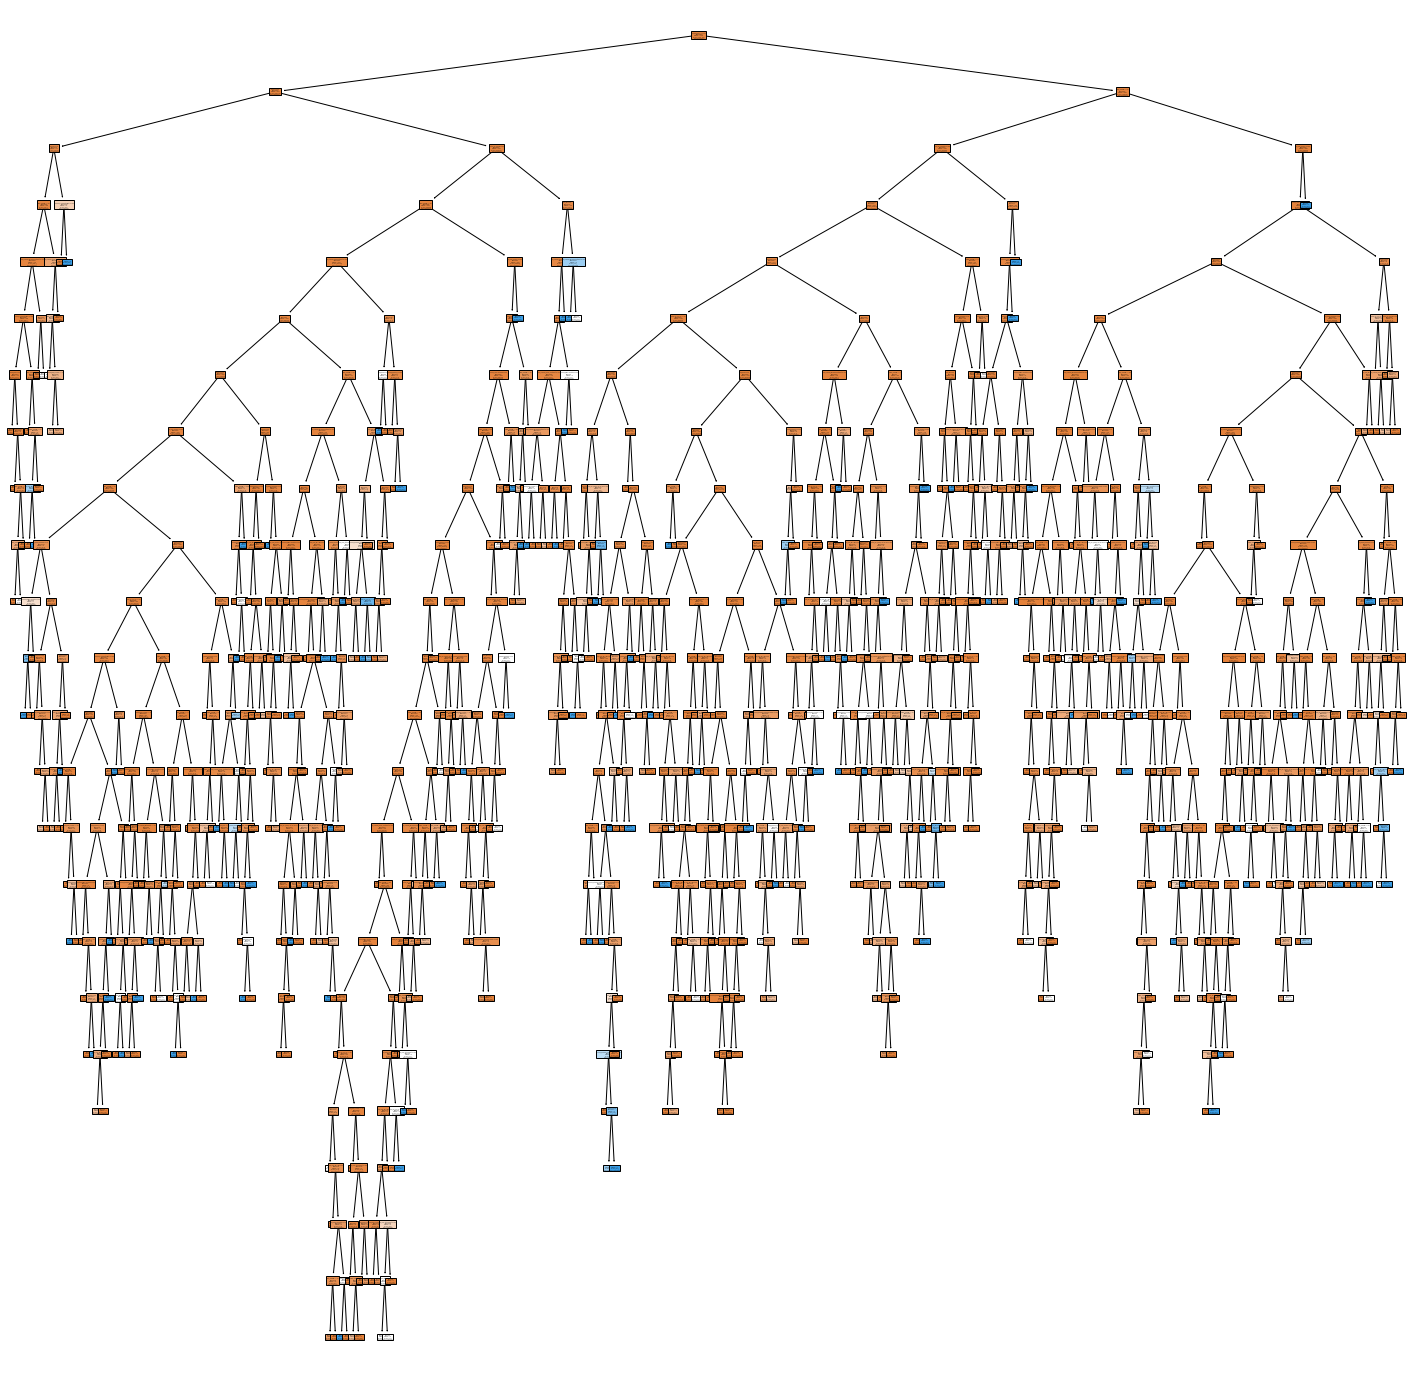

In [109]:
plt.figure(figsize=(25,25))
plot_tree(clf, 
          filled=True,
          class_names=['aprovados', 'reprovados'],
          feature_names=X.columns);

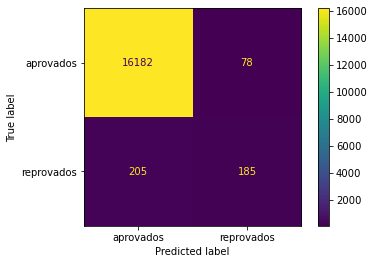

In [110]:
plot_confusion_matrix(clf, X, y, display_labels=['aprovados', 'reprovados'])

In [114]:
predict = clf.predict(X_train)
accuracy_score(y_train, predict)

0.9897897897897898

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

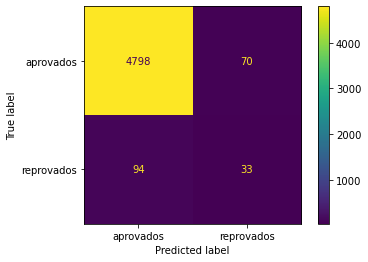

In [115]:
plot_confusion_matrix(clf, X_test, y_test, display_labels=['aprovados', 'reprovados']);

In [116]:
predict = clf.predict(X_test)
accuracy_score(y_test, predict)

0.9671671671671672

Se todos os contratos fossem classificados como bons a acurácia seria de 0.100.